In [2]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

2.0.2
1.23.5


In [3]:
# check xgboost version
data_path = "..\Data\Final_Well_Block_Data.csv"
df = pd.read_csv(data_path)
print("\nLoaded Data :", data_path, "\n----------------------------------------------")
print("\n","\n",df.head())
thres = 1000


Loaded Data : ..\Data\Final_Well_Block_Data.csv 
----------------------------------------------

 
    Well        mTVDSS     Northing      Easting  \
0    105  2795.135390  839185.2579  2516793.718   
1    105  2800.650663  839185.2262  2516793.735   
2    105  2807.395851  839185.1874  2516793.755   
3    105  2814.086270  839185.1489  2516793.775   
4    105  2820.730553  839185.1106  2516793.794   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         41.473   
1                                         42.762   
2                                         41.913   
3                                         42.630   
4                                         40.113   

   BRIT_IND.                     :  Brittleness Index  \
0                                             72.563    
1                                             77.234    
2                                             70.998    
3                                             72.06

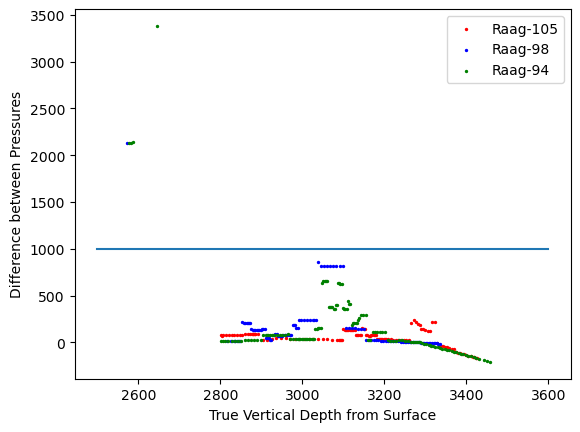

In [4]:
well_name = [[2,119],[331,445],[446,581]]#[[2,119],[120,213],[214,330],[331,445],[446,581]]
diff_list = []
color_l = ['red','blue','green']#['red','blue','green','yellow','black']
well = ['Raag-105','Raag-98','Raag-94']#['Raag-105','Raag-106','Raag-107','Raag-98','Raag-94']
i=0
for start,end in well_name:
    diff, depth = df.iloc[start-1:end,-2]-df.iloc[start-1:end,-1], df.iloc[start-1:end,1]
    new_diff = [depth, diff, color_l[i], well[i]]
    diff_list.append(new_diff)
    i+=1
for depth, diff, color_n, well in diff_list:
    plt.scatter(depth, diff, color = color_n, s=2, label = well)
    plt.xlabel('True Vertical Depth from Surface')
    plt.ylabel('Difference between Pressures')
x = [2500,3600]
y = [thres,thres]
plt.plot(x,y)
plt.legend()

In [5]:
press_diff = []
i = 0  
j = 0
for check in df['PRESS_PP.PSI                  :  Pore Pressure']-df['Well Block Pressure (psi)']:
    if(check>thres):
        press_diff.append(1)
        i+=1
    else:
        press_diff.append(0)
        j+=1
print(press_diff)
print('number of Depleted', i)
print('number of Normal Zones', j)
df.drop(['Well Block Pressure (psi)'], axis=1)
df['Depletion'] = press_diff

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
df.head(20)

,Well,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure,Well Block Pressure (psi),Depletion
0,105,2795.135390,839185.2579,2516793.718,41.473,72.563,54.921,90.206,1281.981,61.927,...,3240.794,5688.247,16147.993,1.700,9501.305,7.314,4.883,5107.361,5033.659180,0
1,105,2800.650663,839185.2262,2516793.735,42.762,77.234,50.990,103.479,1341.285,58.283,...,3744.189,6134.636,17157.750,1.725,9945.014,8.243,5.728,5110.932,5036.105469,0
2,105,2807.395851,839185.1874,2516793.755,41.913,70.998,50.289,91.708,1301.960,60.666,...,3296.255,5836.618,16483.615,1.730,9527.793,7.420,4.976,5115.263,5039.099609,0
3,105,2814.086270,839185.1489,2516793.775,42.630,72.064,47.799,96.330,1335.093,58.650,...,3469.307,6087.185,17050.414,1.748,9756.221,7.743,5.267,5119.555,5042.071289,0
4,105,2820.730553,839185.1106,2516793.794,40.113,59.425,38.943,79.907,1221.895,65.936,...,2870.961,5254.251,15166.269,1.818,8341.209,6.593,4.263,5123.810,5045.024414,0
5,105,2827.334950,839185.0623,2516793.806,40.225,62.202,43.906,80.499,1226.751,65.599,...,2891.730,5288.644,15244.065,1.777,8578.456,6.635,4.297,5127.931,5047.961426,0
6,105,2833.906009,839185.0099,2516793.814,37.231,39.789,29.013,50.564,1102.140,75.005,...,1916.809,4443.524,13332.355,1.917,6956.372,4.540,2.662,5132.016,5050.885742,0
7,105,2840.449387,839184.9576,2516793.822,39.028,57.828,42.842,72.814,1175.655,69.257,...,2626.834,4932.695,14438.890,1.786,8086.847,6.097,3.853,5136.065,5053.800293,0
8,105,2846.971333,839184.9055,2516793.831,36.395,40.959,38.189,43.729,1069.133,77.789,...,1715.719,4232.632,12855.304,1.825,7044.361,4.061,2.324,5140.078,5056.706543,0
9,105,2853.476908,839184.8560,2516793.832,41.665,71.346,47.282,95.410,1290.670,61.375,...,3434.588,5752.521,16293.385,1.751,9303.000,7.679,5.208,5143.962,5059.607910,0


In [7]:
df = df.drop(['Well Block Pressure (psi)'], axis=1)

In [8]:
df_max_scaled = df.copy()
i = 0  
# apply normalization techniques
for column in df_max_scaled.iloc[:,1:-1].columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# ## view normalized data
display(df_max_scaled)

,Well,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure,Depletion
0,105,0.793163,0.999582,0.999656,0.041504,0.545267,0.466072,0.550043,0.825238,0.061973,...,0.573671,0.504677,0.721814,0.765055,0.669819,0.777754,0.586058,0.477789,0.952990,0
1,105,0.794728,0.999582,0.999656,0.042794,0.580366,0.432713,0.630977,0.863413,0.058327,...,0.668761,0.583069,0.778459,0.812895,0.679669,0.814075,0.660497,0.560470,0.953656,0
2,105,0.796642,0.999582,0.999656,0.041944,0.533507,0.426764,0.559202,0.838098,0.060712,...,0.673510,0.513313,0.740642,0.780956,0.681639,0.779922,0.594551,0.486888,0.954464,0
3,105,0.798540,0.999582,0.999656,0.042662,0.541517,0.405633,0.587385,0.859427,0.058694,...,0.732857,0.540262,0.772437,0.807809,0.688731,0.798621,0.620433,0.515362,0.955265,0
4,105,0.800426,0.999582,0.999656,0.040143,0.446543,0.330479,0.487244,0.786559,0.065985,...,0.740864,0.447084,0.666742,0.718543,0.716312,0.682791,0.528285,0.417123,0.956059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,102,0.926454,0.998037,0.999859,0.040067,0.463503,0.392581,0.470152,0.784453,0.066214,...,0.657639,0.431901,0.663810,0.716067,0.693065,0.703366,0.512580,0.401076,0.992971,0
1297,102,0.928337,0.998037,0.999859,0.041344,0.457198,0.296848,0.528708,0.820603,0.062437,...,0.789354,0.484795,0.715091,0.759377,0.730890,0.707424,0.566426,0.456849,0.993290,0
1298,102,0.930218,0.998037,0.999859,0.037967,0.415095,0.433519,0.362175,0.727845,0.072757,...,0.572722,0.340808,0.587561,0.651670,0.679669,0.652860,0.413301,0.304990,0.993595,0
1299,102,0.932098,0.998037,0.999859,0.041592,0.478028,0.305419,0.556342,0.827782,0.061721,...,0.743538,0.510613,0.725518,0.768183,0.726950,0.719355,0.591907,0.484051,0.993899,0


In [9]:
# number of fraud cases
depleted = len(df_max_scaled[df_max_scaled.Depletion == 1])
# selecting the indices of the non-fraud classes
depleted_indices = df_max_scaled[df_max_scaled.Depletion == 1].index
non_depleted_indices = df_max_scaled[df_max_scaled.Depletion == 0].index
# from all non-fraud observations, randomly select observations equal to number of fraud observations
random_non_depleted_indices = np.random.choice(non_depleted_indices, depleted, replace = False)
random_non_depleted_indices = np.array(random_non_depleted_indices)
# appending the 2 indices
under_sample_indices = np.concatenate([depleted_indices,random_non_depleted_indices])
# undersample dataset
under_sample_data = df_max_scaled.iloc[under_sample_indices,:]
# now split X, y variables from the under sample data
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Depletion']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Depletion']
display(X_undersample)
y_undersample

,Well,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,SHMIN_GRAD. : Horizontal Stress Gradient (Min),STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure
444,94,0.729975,0.998232,0.999634,0.030024,0.201280,0.287581,0.120032,0.539055,0.000000,...,0.894901,0.563296,0.166908,0.368113,0.466332,0.734831,0.431946,0.190545,0.121722,0.922122
445,94,0.731422,0.998231,0.999634,0.029984,0.190445,0.269871,0.115166,0.538203,0.000000,...,0.900104,0.569444,0.163843,0.367241,0.465596,0.743499,0.426424,0.186058,0.118493,0.922921
446,94,0.732863,0.998230,0.999634,0.029484,0.190340,0.276872,0.109971,0.527413,0.000000,...,0.897503,0.560615,0.160591,0.356283,0.456342,0.739953,0.419839,0.181250,0.114971,0.923691
447,94,0.734298,0.998229,0.999634,0.029799,0.209479,0.304613,0.121087,0.534192,0.000000,...,0.887617,0.546140,0.167573,0.363148,0.462140,0.727344,0.432556,0.191506,0.122407,0.924481
580,101,0.750733,0.998036,0.999859,0.030364,0.108568,0.121243,0.089080,0.546481,0.100284,...,0.950572,0.836608,0.147708,0.375759,0.472790,0.835697,0.385082,0.162099,0.101468,0.933136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,106,0.822277,0.999614,0.999446,0.037665,0.399240,0.425924,0.341894,0.719964,0.073733,...,0.821020,0.490782,0.324630,0.577334,0.643033,0.682033,0.641930,0.394631,0.287965,0.964953
243,107,0.847903,0.999950,0.999451,0.042611,0.445370,0.234644,0.554196,0.857881,0.058837,...,0.879813,0.750885,0.508588,0.770109,0.805843,0.761229,0.720622,0.589904,0.481898,0.978566
549,94,0.932043,0.998099,0.999616,0.043970,0.531004,0.294099,0.650465,0.899636,0.000000,...,0.837149,0.812669,0.602647,0.834325,0.860077,0.732072,0.799884,0.678446,0.581115,0.993917
129,106,0.824715,0.999616,0.999445,0.037500,0.365785,0.335418,0.352626,0.715670,0.074274,...,0.851717,0.782651,0.333155,0.571802,0.638360,0.714342,0.608296,0.404487,0.296967,0.965849


,Depletion
444,1
445,1
446,1
447,1
580,1
...,...
128,0
243,0
549,0
129,0


In [10]:
train_X, test_X, train_y, test_y = train_test_split(X_undersample, y_undersample,
                      test_size = 0.1, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())


       Well     mTVDSS  Northing   Easting  \
1252    102  0.869769  0.998036  0.999859   
585     101  0.756248  0.998036  0.999859   
516      94  0.882865  0.998133  0.999617   
1204    102  0.810826  0.998036  0.999859   
773      97  0.758207  0.998036  0.999859   

      ANGLE_FAIL.DEG                  :  Fail Angle  \
1252                                       0.042480   
585                                        0.032265   
516                                        0.043079   
1204                                       0.036809   
773                                        0.030344   

      BRIT_IND.                     :  Brittleness Index  \
1252                                           0.495379    
585                                            0.204098    
516                                            0.439735    
1204                                           0.241295    
773                                            0.109207    

      BRIT_PR.                     

In [11]:
# train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
# test_dmatrix = xg.DMatrix(data = test_X, label = test_y)

In [12]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xg.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1}
Best score:  0.95599093695855


In [13]:
xgb_model = xg.XGBClassifier(learning_rate = 0.1, max_depth = 5, subsample = 1)
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [14]:
pred = xgb_model.predict(test_X)
accuracy = accuracy_score(test_y, pred)
accuracy

0.9420289855072463

In [15]:
pred_train = xgb_model.predict(train_X)
accuracy = accuracy_score(train_y, pred_train)
accuracy

1.0

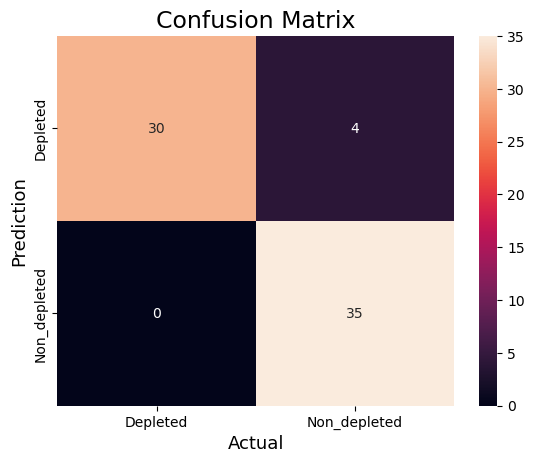

In [16]:
cm = confusion_matrix(test_y,pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Depleted','Non_depleted'],
            yticklabels=['Depleted','Non_depleted'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [17]:
xgb_model.get_booster().get_score(importance_type="gain")

{'Well ': 2.216085433959961,
 'mTVDSS': 5.044677257537842,
 'Northing': 26.240320205688477,
 'Easting': 1.5370495319366455,
 'ANGLE_FAIL.DEG                  :  Fail Angle': 2.2224714756011963,
 'BRIT_IND.                     :  Brittleness Index': 1.8496053218841553,
 "BRIT_PR.                     :  Brittleness Index from Poisson's Ratio": 0.639415442943573,
 "BRIT_YM.                     :  Brittleness Index from Young's Modulus": 0.9767687916755676,
 'DTCO .US/F                 :  Compressional slowness': 0.3818022310733795,
 'DTSM .US/F                 :  Fast Shear Slowness': 0.9208410978317261,
 'IP   .RAYL/M2                 :  P Impedence': 1.7482656240463257,
 'IS   .RAYL/M2                 :  S Impedance': 1.0579886436462402,
 'KBULK.                     :  Bulk Mudulus': 0.8050121068954468,
 'LAMRHO.                     :  ': 0.5491713285446167,
 'MU   .CP                   :  Mu': 1.2456848621368408,
 'PRESS_OB.PSI                  :  Over-burden Pressure': 0.3516139984130

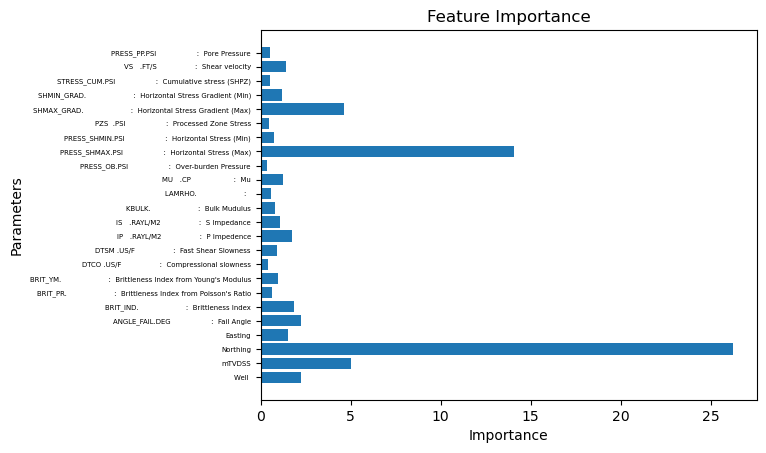

In [18]:
feature_importance = xgb_model.get_booster().get_score(importance_type="gain")
y=list(feature_importance.keys())
 
# getting values against each value of y
x=list(feature_importance.values())
plt.barh(y, x)
# setting label of y-axis
plt.ylabel("Parameters")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()